In [301]:
#Author: Anderson do Nascimento Quaresma.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import gauss, randrange, random

dados = pd.read_csv('AirPassengers.csv',encoding = "ISO-8859-1",decimal = ",", sep=',')

In [302]:
dados.head()



,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [303]:
dados['Month'] = pd.to_datetime(dados['Month']) 

serie_passagens = pd.Series(dados['#Passengers'].values, index= dados['Month'])

serie_passagens.dtypes



dtype('int64')

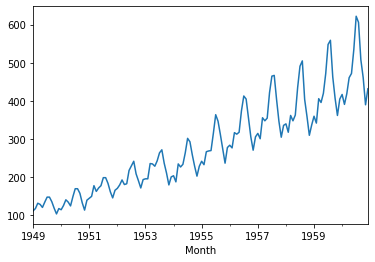

In [304]:
serie_passagens.plot()

#Há uma tendência como também há uma sazonalidade, com isso, irei iniciar removendo a tendência.

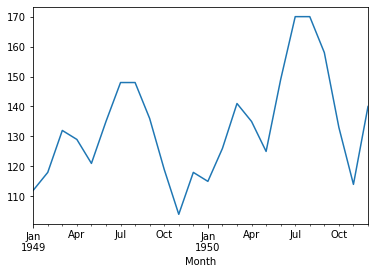

In [344]:
#Pegando um período
serie_passagens.loc['1949':'1950'].plot()

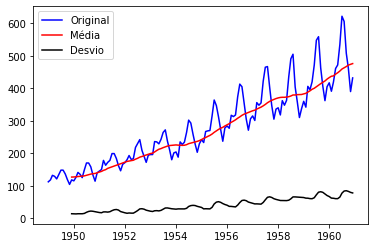

In [345]:
m_m = serie_passagens.rolling(window=12).mean()
m_std = serie_passagens.rolling(window=12).std() 

orig = plt.plot(serie_passagens, color='blue',label='Original')
mean = plt.plot(m_m, color='red',label='Média')
std = plt.plot(m_std, color='black',label='Desvio')
plt.legend(loc='best')
plt.show()

#Essa média não está constante, ou seja, ela não é estacionária.
# justamente a média, diz que um modelo é estacionário ou não.

#Não é um modelo estacionário.

In [307]:
#Estimando componente e tendência

#utilizando regressão linear para modelar tendência
from sklearn.linear_model import LinearRegression


X = [i for i in range(0, len(serie_passagens))] #indices
X = np.reshape(X, (len(X), 1))
y = serie_passagens
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [308]:
tendencia = modelo.predict(X)

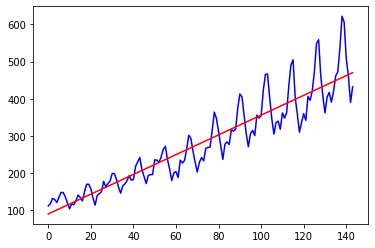

In [309]:
plt.plot(serie_passagens.values, color='blue',label='Original')
plt.plot(tendencia,color='red', label='Tendência' )
plt.show()

In [310]:
#eliminando a tendência
serie_sem_tendencia = serie_passagens - tendencia

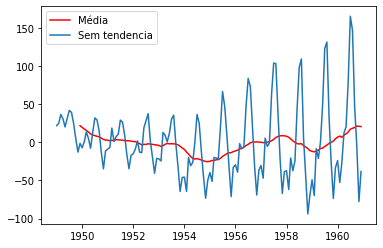

In [311]:
m_m = serie_sem_tendencia.rolling(window=12).mean()
mean = plt.plot(m_m, color='red',label='Média')
plt.plot(serie_sem_tendencia, label='Sem tendencia')
plt.legend(loc='best')
plt.show()


In [312]:
#Primeiro eu estimo a sazonalidade

# fit polynomial
from numpy import polyfit

X = [i for i in range(0, len(serie_sem_tendencia))]
y = serie_sem_tendencia.values
degree = 10 #4 polinomios
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef);

Coefficients: [-9.28162487e-16  6.35068742e-13 -1.86257525e-10  3.06239585e-08
 -3.09494810e-06  1.97789535e-04 -7.88859767e-03  1.85342432e-01
 -2.24487517e+00  9.33642943e+00  2.03178296e+01]


In [313]:
curva = []
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curva.append(value)

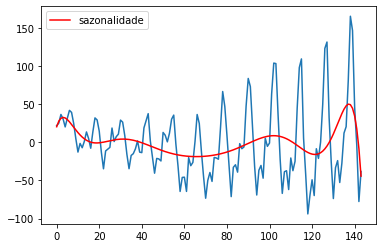

In [314]:
plt.plot(serie_sem_tendencia.values)
plt.plot(curva, color='red', label='sazonalidade')
plt.legend(loc='best')
plt.show()

In [315]:
#eliminando a sazonalidade
serie_sem_tendencia_sazonalidade = serie_sem_tendencia - curva

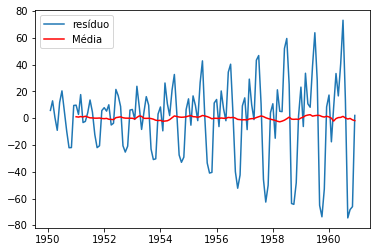

In [352]:
m_m = serie_sem_tendencia_sazonalidade.rolling(window=12).mean()
plt.plot(serie_sem_tendencia_sazonalidade, label='resíduo')
mean = plt.plot(m_m, color='red',label='Média')
plt.legend(loc='best')
plt.show()

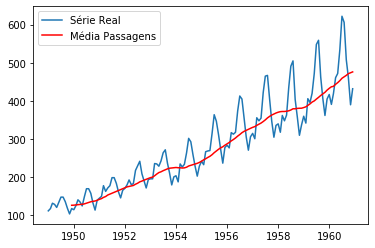

In [353]:
#Aplicando técnicas de suavização:

#Estimando e eliminando a tendência através de média móveis

rolling = serie_passagens.rolling(window=12)
rolling_mean = rolling.mean()

# plot original and transformed dataset
plt.plot(serie_passagens, label='Série Real')
plt.plot(rolling_mean,color='red', label='Média Passagens')
plt.legend(loc='best')
plt.show()


In [354]:
serie_sem_tendencia = serie_passagens - rolling_mean

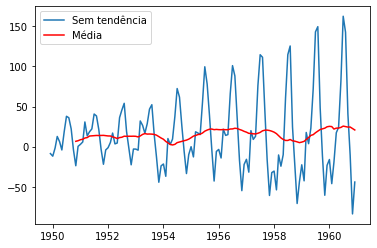

In [355]:
m_m = serie_sem_tendencia.rolling(window=12).mean()
plt.plot(serie_sem_tendencia, label='Sem tendência')
mean = plt.plot(m_m, color='red',label='Média')
plt.legend(loc='best')
plt.show()

#Média móvel sem tendência.

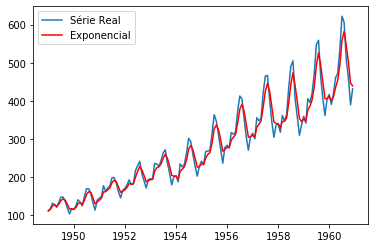

In [356]:
#### Estimando a tendência através de suavização exponencial
rolling = serie_passagens.ewm(alpha =0.5)
rolling_exp = rolling.mean()
plt.plot(serie_passagens, label='Série Real')
plt.plot(rolling_exp,color='red', label='Exponencial')
plt.legend(loc='best')
plt.show()


In [357]:
#eliminando a tendência
serie_sem_tendencia_exp = serie_passagens - rolling_exp

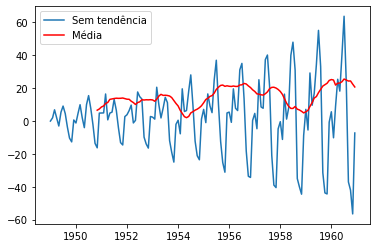

In [358]:
m_m = serie_sem_tendencia.rolling(window=12).mean()
plt.plot(serie_sem_tendencia_exp, label='Sem tendência')
mean = plt.plot(m_m, color='red',label='Média')
plt.legend(loc='best')
plt.show()
#Aqui temos uma série sem tendência.

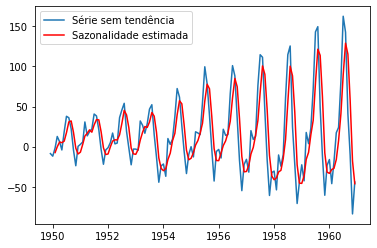

In [359]:
#### Estimando e eliminando a sazonalidade através de média móveis

rolling = serie_sem_tendencia.rolling(window=3)
rolling_mean = rolling.mean()
plt.plot(serie_sem_tendencia, label='Série sem tendência')
plt.plot(rolling_mean,color='red', label='Sazonalidade estimada')
plt.legend(loc='best')
plt.show()

In [360]:
# eliminando o componente de sazonalidade
serie_sem_tendencia_sazonalidade = serie_sem_tendencia - rolling_mean

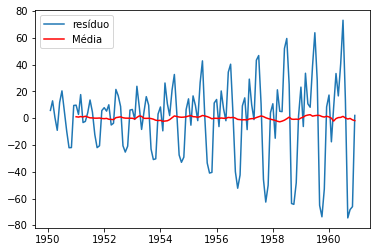

In [361]:
m_m = serie_sem_tendencia_sazonalidade.rolling(window=12).mean()
plt.plot(serie_sem_tendencia_sazonalidade, label='resíduo')
mean = plt.plot(m_m, color='red',label='Média')
plt.legend(loc='best')
plt.show()

#Fazendo a série estacionária sem tendência, após retirar a sazonalidade.

In [362]:
#Utilizando decomposição

from statsmodels.tsa.seasonal import seasonal_decompose

In [363]:
decomp = seasonal_decompose(serie_passagens)

In [364]:
tendencia = decomp.trend #atributo tendencia
sazonalidade = decomp.seasonal #atributo sazonalidade
residuo = decomp.resid #Atributo resíduo

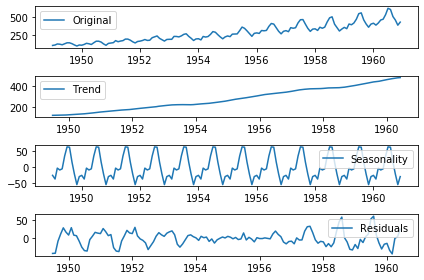

In [365]:
plt.subplot(411)
plt.plot(serie_passagens, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sazonalidade,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuo, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

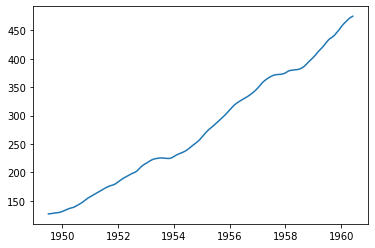

In [366]:
plt.plot(tendencia);

In [367]:
# Analisando o ruído

In [368]:
import statsmodels.graphics.tsaplots as smt

#Chegando nessa parte, a idéia agora é ajsutar a última parte, que é eliminar o ruído branco.
#Qual a decomposição eu utilizo? O nosso critério é ver o correlograma.

In [369]:
serie_sem_tendencia_sazonalidade.dropna(inplace=True) 

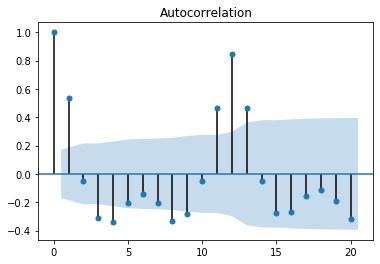

In [388]:
smt.plot_acf(serie_sem_tendencia_sazonalidade, lags=20, alpha=0.05);

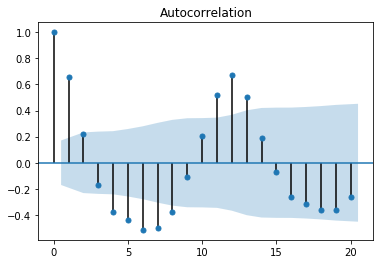

In [389]:
smt.plot_acf(residuo.dropna(), lags=20, alpha=0.05);

In [372]:
#Aplicando diferenciação


#Isso tudo que fizemos podemos fazer isso utilizando o método da diferenciação.
#Que é o valor de amanhã menos o valor de hoje.

serie_diff_pd = serie_passagens.diff()

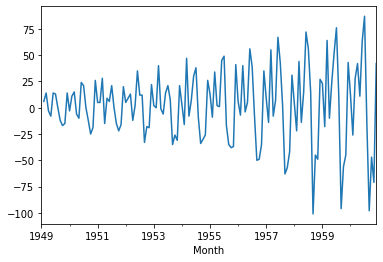

In [373]:
serie_diff_pd.plot() #Já foi a tendência

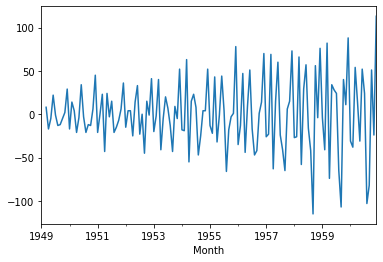

In [374]:
serie_diff_pd.diff().plot() #Quiser aplicar outra diferenciação. No máquimo aplicar 2 diferenciação

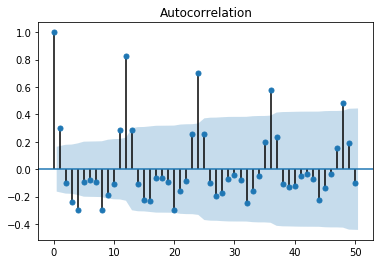

In [375]:
smt.plot_acf(serie_diff_pd.dropna(), lags=50, alpha=0.05);
#Mudando os lags, para 50 vocÊ consegue enxergar no correlogama,
#quais os meses passados tem correlação com os mêses anteriores,
#nesse caso a baixo, por exemplo, o mês de dezembro, não tem muita correlação com o mês anteiror
# e sim com o mês no ano passado, no caso de "Dezembro"

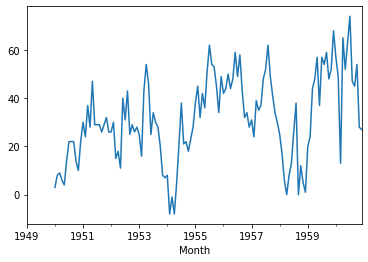

In [376]:
serie_passagens.diff(12).plot()

#A série não tem mais o componente sazional.

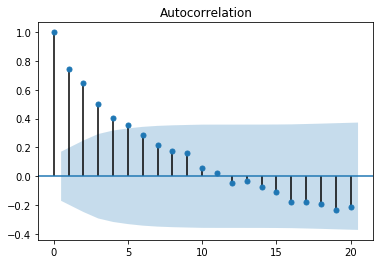

In [391]:
smt.plot_acf(serie_passagens.diff(12).dropna(), lags=20, alpha=0.05);

#Plot do acf é uma função de correlação.

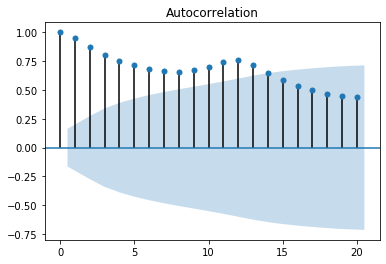

In [385]:
smt.plot_acf(serie_passagens, lags=20, alpha=0.05);

#essa diferenciação é utilizado também dentro da lógica da sarima.